In [31]:
import pandas
cake = pandas.read_csv('csvFiles/cake.csv')
cake.columns = ['try', 'replicate', 'recipe', 'temperature','angle','temp']

In [32]:
cake.dtypes

try             int64
replicate       int64
recipe         object
temperature     int64
angle           int64
temp            int64
dtype: object

In [33]:
cake = pandas.DataFrame(cake)
del cake['temperature']

In [55]:
cakeA = cake.loc[cake['recipe'] == 'A']
temps = [175, 185, 195, 205, 215, 225]
cakeA['angle'].mean()

33.12222222222222

In [53]:
cake

,try,replicate,recipe,angle,temp
0,1,1,A,42,175
1,2,1,A,46,185
2,3,1,A,47,195
3,4,1,A,39,205
4,5,1,A,53,215
5,6,1,A,42,225
6,7,1,B,39,175
7,8,1,B,46,185
8,9,1,B,51,195
9,10,1,B,49,205


In [59]:
#gives average angle for each temp 
for temp in temps:
    print cakeA.loc[cakeA['temp'] == temp]['angle'].mean()

29.1333333333
31.5333333333
30.8
33.5333333333
38.6666666667
35.0666666667


In [78]:
recipes = ['A', 'B', 'C']

recipe_dict = dict()

recipe_temps = []
for recipe in recipes:
    print recipe
    if recipe not in recipe_dict:
        recipe_dict[recipe] = dict()
    for temp in temps:   
        curRecipe = cake.loc[cake['recipe'] == recipe]
        recipe_dict[recipe][temp] = curRecipe.loc[curRecipe['temp'] == temp]['angle'].mean()

A
B
C


In [79]:
recipe_dict

{'A': {175: 29.133333333333333,
  185: 31.533333333333335,
  195: 30.8,
  205: 33.53333333333333,
  215: 38.666666666666664,
  225: 35.06666666666667},
 'B': {175: 26.866666666666667,
  185: 29.4,
  195: 31.733333333333334,
  205: 32.13333333333333,
  215: 34.46666666666667,
  225: 35.266666666666666},
 'C': {175: 27.933333333333334,
  185: 28.933333333333334,
  195: 31.733333333333334,
  205: 30.866666666666667,
  215: 34.4,
  225: 35.733333333333334}}

In [70]:
import matplotlib.pyplot as plt

/Users/port664/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [73]:
D = {u'Label1':26, u'Label2': 17, u'Label3':30}

plt.bar(range(len(recipe_dict['A'])), recipe_dict['A'].values())
plt.xticks(range(len(recipe_dict['A'])), recipe_dict['A'].keys())

plt.show()

<IPython.core.display.Javascript object>


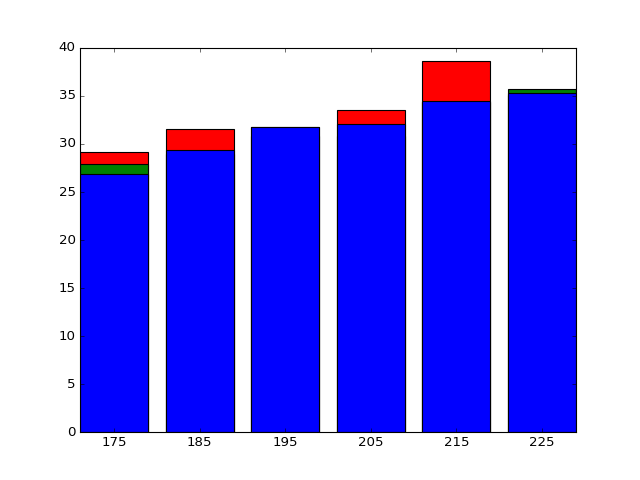

In [97]:
%matplotlib notebook
sub = plt.subplot()

for recipe in recipe_dict:

    temps = sorted(recipe_dict[recipe].keys())
    vals = []
    for temp in temps:
        vals.append(recipe_dict[recipe][temp])
    
    colors = ['r', 'g', 'b']
    col = colors[recipe_dict.keys().index(recipe)]
    
    plt.bar(range(len(recipe_dict[recipe])), vals, color=col, label=recipe, align='center')
    plt.xticks(range(len(recipe_dict[recipe])), temps)
    
    plt.show()